#Импорт#

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
from wordcloud import WordCloud

In [185]:
data = pd.read_csv("books_data.csv")

In [186]:
data.head()


,Unnamed: 0,Books,Authors,Language,First_Published,Sales_in_millions
0,0,A Tale of Two Cities,Charles Dickens,English,1859,200.0
1,1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0
2,2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0
3,3,And Then There Were None,Agatha Christie,English,1939,100.0
4,4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0


In [187]:
data.shape

(290, 6)

In [188]:
data.isnull().sum()

Unnamed: 0           0
Books                0
Authors              0
Language             0
First_Published      0
Sales_in_millions    2
dtype: int64

In [189]:
data.dropna(inplace=True)

In [190]:
data["First_Published"] = data["First_Published"].str.slice(0,4).astype(int)

In [191]:
data

,Unnamed: 0,Books,Authors,Language,First_Published,Sales_in_millions
0,0,A Tale of Two Cities,Charles Dickens,English,1859,200.0
1,1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0
2,2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0
3,3,And Then There Were None,Agatha Christie,English,1939,100.0
4,4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0
...,...,...,...,...,...,...
285,285,The No. 1 Ladies Detective Agency,Alexander McCall Smith,English,1999,15.0
286,286,Der Regenbogenfisch (Rainbow Fish),Marcus Pfister,German,1992,15.0
287,287,The Riftwar Cycle,Raymond E. Feist,English,1982,15.0
288,288,The Thrawn trilogy,Timothy Zahn,English,1991,15.0


In [192]:
data.dtypes

Unnamed: 0             int64
Books                 object
Authors               object
Language              object
First_Published        int64
Sales_in_millions    float64
dtype: object

<Axes: xlabel='Sales_in_millions', ylabel='Count'>

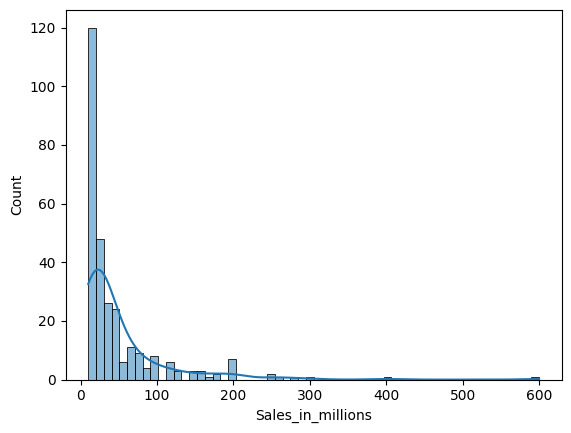

In [193]:
sns.histplot(data=data, x="Sales_in_millions", kde=True)

<Axes: xlabel='Sales_in_millions', ylabel='Count'>

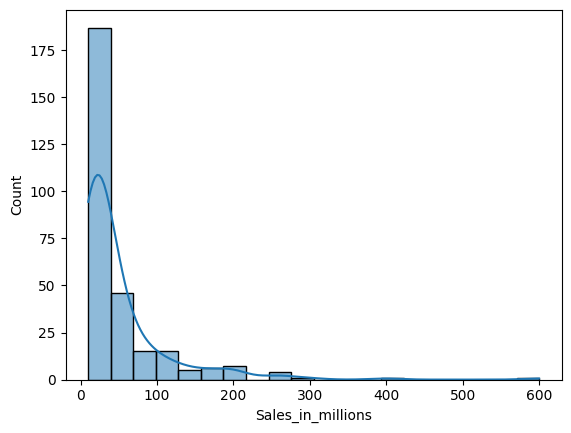

In [194]:
sns.histplot(data=data, x="Sales_in_millions", kde=True, bins=20)

In [195]:
language_counts = data["Language"].value_counts()
#print(language_counts.index.tolist())
languages_sorted = language_counts.index.tolist()
languages_sorted.reverse()
#print(language_counts.values)
books_by_language_sorted = language_counts.values.tolist()
books_by_language_sorted.reverse()

In [196]:
print(language_counts)

Language
English       209
Japanese       26
French          9
Russian         7
Chinese         6
German          6
Swedish         6
Italian         5
Norwegian       4
Spanish         3
Dutch           2
Portuguese      1
Czech           1
Yiddish         1
Gujarati        1
Polish          1
Name: count, dtype: int64


In [197]:
data.Language

0      English
1       French
2      English
3      English
4      Chinese
        ...   
285    English
286     German
287    English
288    English
289     Polish
Name: Language, Length: 288, dtype: object

In [198]:
y = [i * 0.9 for i in range(len(languages_sorted))]
print(y)

[0.0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9.0, 9.9, 10.8, 11.700000000000001, 12.6, 13.5]


In [199]:
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

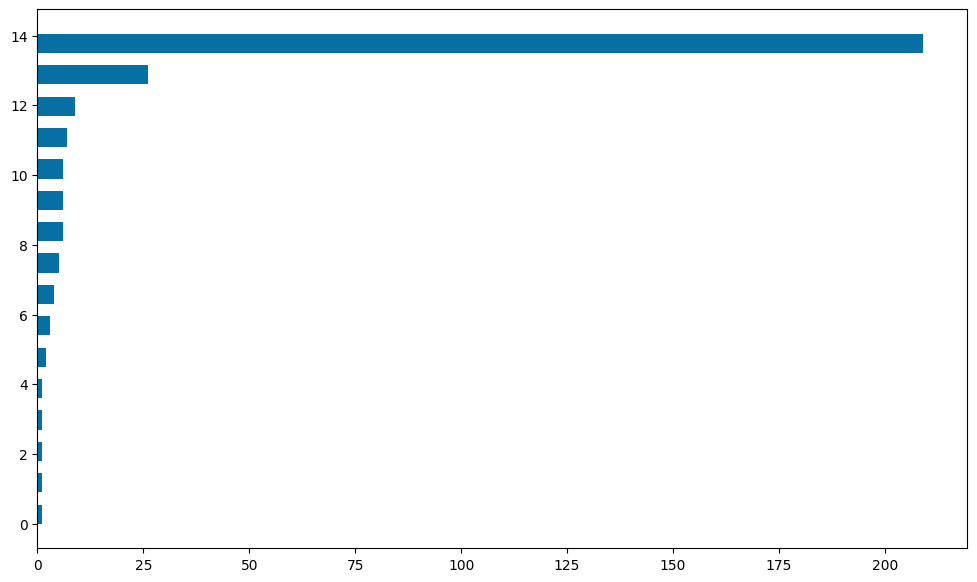

In [200]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.barh(y, books_by_language_sorted, height=0.55, align="edge", color=BLUE);

In [201]:
my_subs = [i*3 for i in range (1,9)]
my_subs.append(209)
my_subs_str = list(map(str, my_subs))
print(my_subs)

[3, 6, 9, 12, 15, 18, 21, 24, 209]


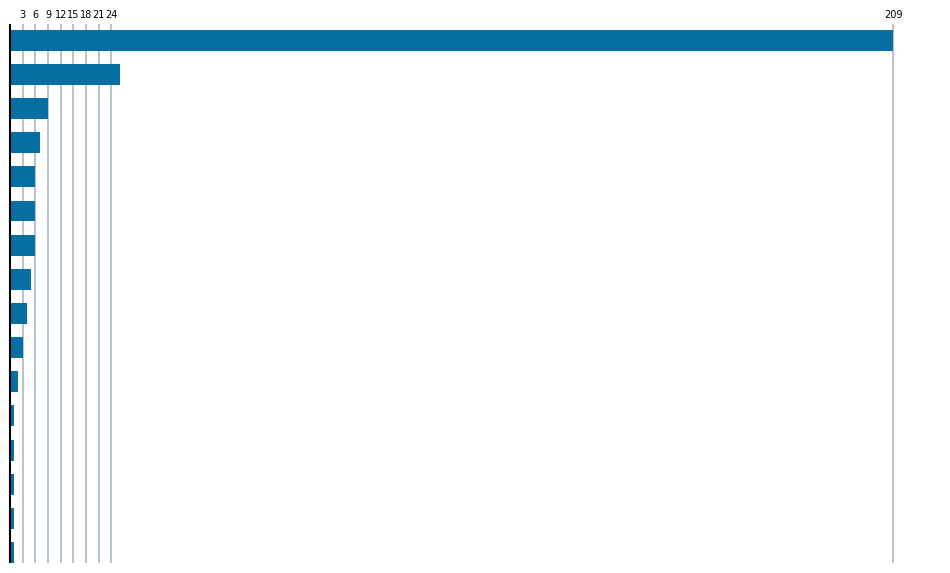

In [202]:
ax.xaxis.set_ticks(my_subs)
ax.xaxis.set_ticklabels(my_subs_str, size=7, fontfamily="sans-serif")
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 220))
ax.set_ylim((0, len(languages_sorted) * 0.9 - 0.2))

ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.yaxis.set_visible(False)

fig

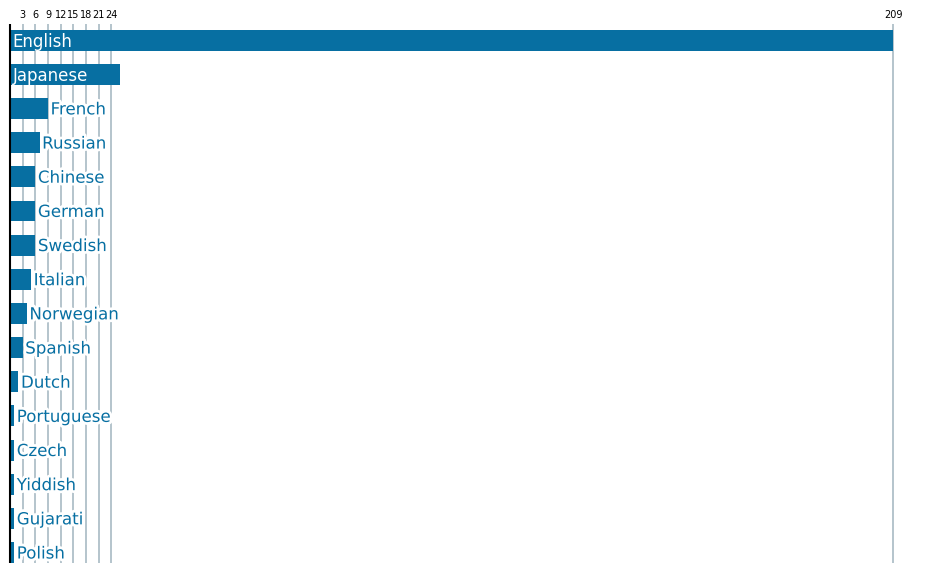

In [203]:
PAD = 0.6
for name, count, y_pos in zip(languages_sorted, books_by_language_sorted, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 20:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=4, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontfamily="sans-serif", fontsize=12, va="center",
        path_effects=path_effects
    ) 
fig   

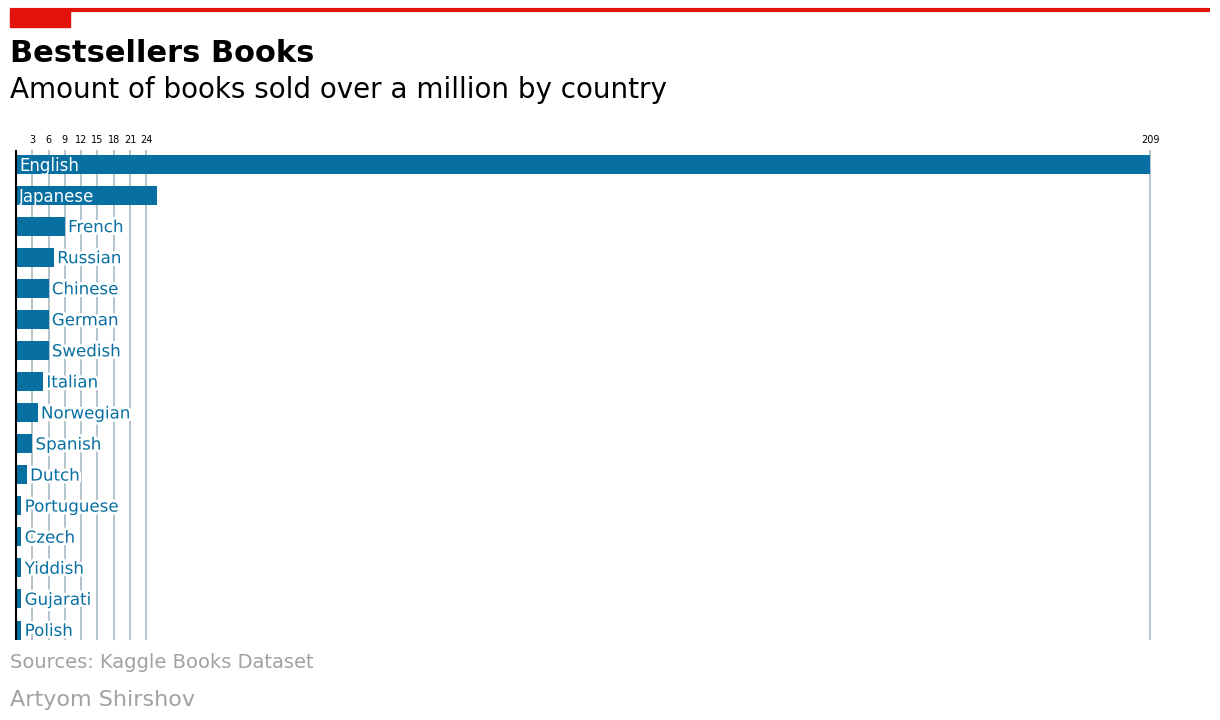

In [204]:
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)
fig.text(
    0, 0.925, "Bestsellers Books", 
    fontsize=22, fontweight="bold")
fig.text(
    0, 0.875, "Amount of books sold over a million by country", 
    fontsize=20)
source = "Sources: Kaggle Books Dataset"
fig.text(
    0, 0.06, source, color=GREY, 
    fontsize=14)
fig.text(
    0, 0.005, "Artyom Shirshov", color=GREY,
    fontsize=16)
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))
fig.set_facecolor("white")
fig

In [205]:
min_start = data["First_Published"].min()
min_start = min_start - min_start % 100
res = {}
for i in range(min_start,  2100,  100):
    res[f"{i}-{i+99}"] = data[(data["First_Published"] >= i) & (data["First_Published"] < i+100)].shape[0]

{'1300-1399': 1, '1400-1499': 0, '1500-1599': 0, '1600-1699': 0, '1700-1799': 2, '1800-1899': 10, '1900-1999': 220, '2000-2099': 55}


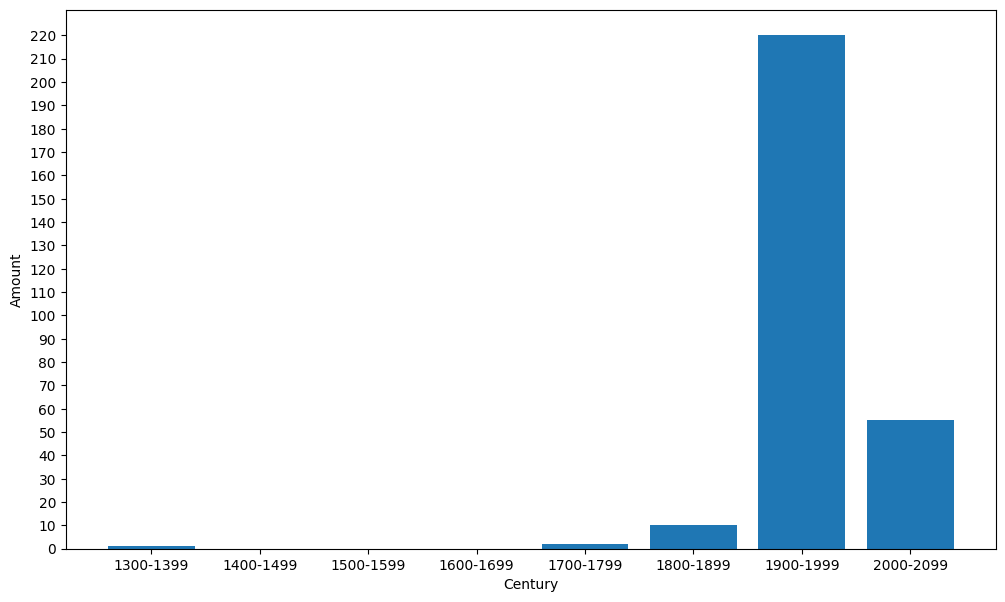

In [248]:
print(res)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(list(res.keys()), list(res.values()))
ax.set_xlabel("Century")
ax.set_ylabel("Amount")
ax.set_yticks(range(0,221,10))


['CharlesDickens', 'AntoinedeSaint-Exupéry', 'J.K.Rowling', 'AgathaChristie', 'CaoXueqin', 'J.R.R.Tolkien', 'H.RiderHaggard', 'DanBrown', 'J.K.Rowling', 'J.K.Rowling', 'J.K.Rowling', 'J.K.Rowling', 'J.K.Rowling', 'J.K.Rowling', 'PauloCoelho', 'J.D.Salinger', 'RobertJamesWaller', 'GabrielGarcíaMárquez', 'VladimirNabokov', 'JohannaSpyri', 'BenjaminSpock', 'LucyMaudMontgomery', 'AnnaSewell', 'UmbertoEco', 'JackHiggins', 'RichardAdams', 'ShereHite', 'E.B.White;illustratedbyGarthWilliams', 'J.P.Donleavy', 'BeatrixPotter', 'RichardBach', 'EricCarle', 'ElbertHubbard', 'HarperLee', 'V.C.Andrews', 'CarlSagan', 'JosteinGaarder', 'DanBrown', 'WilliamGriffithWilson', 'JeffreyArcher', 'NikolaiOstrovsky', 'LeoTolstoy', 'CarloCollodi', 'AnneFrank', 'WayneDyer', 'ColleenMcCullough', 'KhaledHosseini', 'JacquelineSusann', 'DaleCarnegie', 'F.ScottFitzgerald', 'MargaretMitchell', 'DaphneduMaurier', 'WilliamBradfordHuie', 'StiegLarsson', 'DanBrown', 'SuzanneCollins', 'RoaldDahl', 'AlexanderAlexandrovichFad

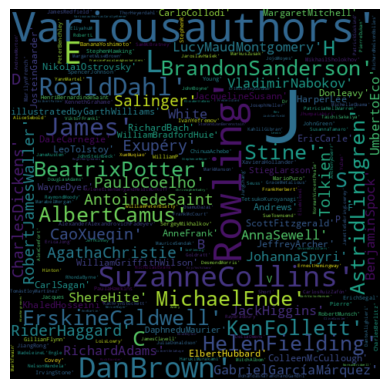

In [266]:
authors = data["Authors"].values.tolist()
authors = list(map(lambda x: ''.join(x.split(' ')), authors))
print(authors)
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(authors))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

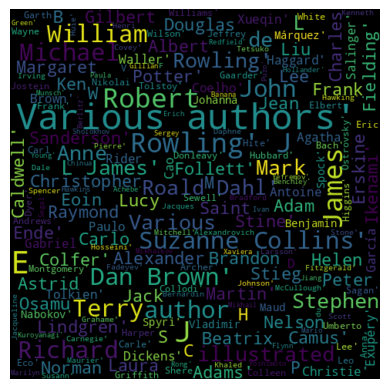

In [270]:

text = data["Authors"].values 
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(text))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()